# Сегментация пользователей "Метанпромбанка" по потреблению 

## Материалы

[Дашборд](https://public.tableau.com/views/_16895301810090/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)\
[Презентация](https://drive.google.com/file/d/10osE8Jeana7XkWYFOw18f0tss8f4_3D5/view?usp=drive_link)

---
<a id='contens'></a> 
# Оглавление
1. [Цель проекта](#goal)
2. [Задачи проекта](#task)
3. [Описание данных](#data_name)
4. [Импорт библиотек](#import_bibl)
5. [Функции](#function)
6. [Загрузка данных и изучение общей информации](#import)
7. [Предобработка данных](#preprocessing)\
    7.1 [Переименование колонок](#rename_columns)\
    7.2 [Изучение пропусков](#pass)\
    7.3 [Изменение типа данных](#change_types)\
    7.4 [Проверка на наличие дубликатов](#check_dubl)\
    7.5 [Исследование аномалий в данных](#anomaly)
8. [Исследовательский анализ данных](#eda)\
    8.1 [Портрет типичных клиентов](#portrait)\
    8.2 [Анализ распределения количественных и качественных прикнаков клиентов банка](#distribulion)\
    8.3 [Корреляционный анализ данных](#corr)
9. [Проверка статистических гипотез](#hipothesis)\
    9.1 [Гипотеза №1](#ipothesis1)\
    9.2 [Гипотеза №2](#ipothesis2)
10. [Сегментация пользователей](#segmentation)
11. [Выводы и рекомендации](#conclution)

---
<a id='goal'></a> 
## Цель проекта
[Назад к оглавлению](#contens)

Анализ и сегментация пользователей банка "Метанпром" для дальнейшего маркетингового воздействия с целью удержания действующих и уменьшения оттока ушедших клиентов.

---
<a id='task'></a> 
## Задачи проекта
[Назад к оглавлению](#contens)

- Изучить распределение количественных и качественных признаков;
- Исследовать влияние признаков на отток клиентов;
- Сформулировать и проверить статистические гипотезы;
- Провести сегментацию пользователей;

---
<a id='data_name'></a> 
## Описание данных
[Назад к оглавлению](#contens)

- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — приблизительная оценка собственности клиентов;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — был ли клиент активен последнее время;
- EST_SALARY — оценочная заработная плата клиента;
- churn — ушёл или нет.

---
<a id='import_bibl'></a> 
## Импорт библиотек
[Назад к оглавлению](#contens)

In [48]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import set_matplotlib_formats
import scipy.stats as st
import warnings; warnings.filterwarnings(action = 'ignore')

In [49]:
# добавим опции для отображения таблиц и данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:,.2f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
# добавим настройки для диагмрамм
sns.set_style('dark')
custom_palette = ['#16537e', '#cfe2f3', '#9fc5e8', '#6fa8dc', '#3d85c6', '#0b5394', '#073763', '#62a7d7',
                 '#9dbbd5', '#7b95ac', '#697c8c', '#b1d5f5', '#246cac', '#204e77', '#76a5af']
sns.set_palette(custom_palette)
sns.set_context('notebook') 

---
<a id='function'></a> 
## Функции
[Назад к оглавлению](#contens)

---
<a id='df_study'></a> 
### Функция df_study
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#df_study_use)

In [51]:
# напишем функцию для изучения основных характеристик датафрейма
def df_study(df):
      
    # изучим начало и конец выборки
    display(df.head(10), df.tail(10))

    # изучим информацию о датафрейме
    display(df.info())
    
    # изучим статистические показатели
    display(df.describe())
    
    print('-'*50)
    # изучим количество строк и столбцов
    print('Количество строк и столбцов:', df.shape)   

    print('-'*50)
    # посчитаем количество явных дубликатов
    dubl = df.duplicated().sum()
    print('Количество явных дубликатов:' , dubl)
    
    # посчитаем долю дубликатов
    dubl_share = dubl/len(df)
    print(f'Доля явных дубликатов: {dubl_share:.2%}')
    
    print('-'*50)
    # посчитаем количество пропусков
    gap = df.isna().sum()
    print('Количество пропусков:', gap)
    
    # посчитаем долю пропусков
    gap_share = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).round(2)
    print()
    print('Доля пропусков:')
    display(gap_share)
    
    # зададим масимальную ширину столбца
    pd.set_option('max_colwidth', 100) 

---
<a id='pass_analysis'></a> 
### Функция pass_analysis
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#pass_analysis_use)

In [52]:
# напишем функцию для изучения причины пропусков в столбце с балансом

def pass_analysis(name_df, column):
    
    print('Изучение распределения пропусков в столбце "balance" по признаку:', column)
    
    # cгруппируем данные
    temp = (name_df.groupby(column, as_index=False)['user_id'].agg('count')
                   .sort_values(by='user_id', ascending=False)
                   .rename(columns={'user_id' : 'count'}))
    display(temp)

    # отобразим распределение по долям на круговой диаграмме
    temp.plot(y='count',
                kind='pie',
                labels=temp[column],
                autopct='%.0f%%',
                title='Доли пропусков в столбце "balance"',
                figsize=(4, 4),
                legend=False)
    plt.tight_layout()
    plt.show()
    
    print('-'*100)

---
<a id='quantity_plot'></a> 
### Функция quantity_plot
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#quantity_plot_use)

In [53]:
# функция для диаграмм количественных признаков
def quantity_plot(df, column, name):
    
    plt.figure(figsize=(16, 6))

    # 1 график -  столбчатая диаграмма
    sns.histplot(df[df['churn'] == 0][column], ax = plt.subplot(1, 2, 1), stat='density', common_norm=False)
    sns.histplot(df[df['churn'] == 1][column], color = custom_palette[1], ax = plt.subplot(1, 2, 1), alpha=.7,
                stat='density', common_norm=False, label='Отток', legend=True)
    plt.xlabel(name)
    plt.ylabel('Количество клиентов, тыс. чел.')
    plt.legend()
       
    # 2 график - диаграмма размаха
    sns.boxplot(x='churn', y=column, data=df, ax=plt.subplot(1, 2, 2))
    plt.xlabel('Отток')
    plt.ylabel(name)
    
    plt.suptitle(name + ' (' + column + ')')
    plt.tight_layout()
    plt.show()

---
<a id='category_plot'></a> 
### Функция category_plot
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#category_plot_use)

In [54]:
# функция для диаграмм качественных признаков
def category_plot(df, column, name):
    
    table_for_pie = (df.pivot_table(index=column, values='user_id', aggfunc='count')
                   .rename(columns={'user_id' : column}))
    
    # 1 график -  круговая диаграмма
    table_for_pie.plot(
            y=column,
            kind='pie',
            grid=True,
            autopct='%.0f%%',
            title=name,
            legend=False)
    plt.tight_layout()
    plt.show()
   

    # табоица для круговой диаграммы
    table_for_pie2 = (df.query('churn == 0')
                .pivot_table(index=column, values='user_id', aggfunc='count')
                .rename(columns={'user_id' : 'Актив'}))
    temp_churn = (df.query('churn == 1')
                .pivot_table(index=column, values='user_id', aggfunc='count')
                .rename(columns={'user_id' : 'Отток'}))
    table_for_pie2['Отток']=temp_churn['Отток']
    table_for_pie2 = table_for_pie2.T
    
    # 2 график -  круговая диаграмма
    table_for_pie2.plot.pie(subplots = True, 
                             legend= False, 
                             figsize =(12,16),
                             autopct='%1.1f%%')
    plt.show()

---
<a id='categorize_products'></a> 
### Функция categorize_products
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#categorize_products_use)

In [55]:
# напишем функцию для категоризации по количеству продуктов
def categorize_products(products):
    try:
        if products == 1:
            return 'A'
        elif products == 2:
            return 'B'
        elif products == 3:
            return 'C'
        else:
            return 'D'
    except:
        pass

---
<a id='quantity_product_plot'></a> 
### Функция quantity_product_plot
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#quantity_product_plot_use)

In [56]:
# функция для диаграмм количественных признаков по продуктам
def quantity_product_plot(df, column, name):
    plt.figure(figsize=(16, 6))

    # 1 график -  столбчатая диаграмма
    sns.histplot(df[df['products'] == 'A'][column], label='A',color = '#0b5394', ax = plt.subplot(1, 2, 1), stat='density', common_norm=False)
    sns.histplot(df[df['products'] == 'B'][column], color = '#351c75', ax = plt.subplot(1, 2, 1), alpha=.3,
                stat='density', common_norm=False, label='B', legend=True)
    sns.histplot(df[df['products'] == 'C'][column], color = '#38761d', ax = plt.subplot(1, 2, 1), alpha=.3,
                stat='density', common_norm=False, label='C', legend=True)
    sns.histplot(df[df['products'] == 'D'][column], color = '#990000', ax = plt.subplot(1, 2, 1), alpha=.3,
                stat='density', common_norm=False, label='D', legend=True)
    plt.xlabel(name)
    plt.ylabel('Количество клиентов, тыс. чел.')
    plt.legend()
       
    # 2 график - диаграмма размаха
    sns.boxplot(x='products', y=column, data=df, ax=plt.subplot(1, 2, 2))
    plt.xlabel('Сегменты')
    plt.ylabel(name)
    plt.xticks(np.arange(4), ('А', 'B','C', 'D'))
    
    plt.suptitle(name + ' (' + column + ')')
    plt.tight_layout()
    plt.show()

---
<a id='category_product_plot'></a> 
### Функция category_product_plot
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#category_product_plot_use)

In [57]:
# функция для диаграмм качественных признаков по продуктам
def category_product_plot(df, column, name):
    
    # таблица для круговой диаграммы
    temp = (df_prod.pivot_table(index=column, columns='products', values='user_id', aggfunc='count')
                  .rename(columns={'user_id' : column}))
    
    print('Распределение в разрезе количества продуктов клиентов по признаку:', name)
    
    # график -  круговая диаграмма
    temp.plot.pie(subplots = True, 
                             legend= False, 
                             figsize =(16,16),
                             autopct='%1.1f%%')
    plt.show()

---
<a id='import'></a> 
## Загрузка данных и изучение общей информации
[Назад к оглавлению](#contens)

In [58]:
# загружаем файл
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')

<a id='df_study_use'></a> 
Для изучения датафрейма используем написанную функцию.\
[Перейти к функции](#df_study)

In [59]:
# изучим основную информацию
df_study(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9990,162357,822.00,Ярославль,М,31.00,3,"646,575.17",1,1,1,"88,297.63",0
9991,122366,840.00,Ярославль,Ж,44.00,3,"326,619.71",1,1,0,"157,589.59",0
9992,167165,813.00,Рыбинск,М,48.00,2,"179,765.62",2,1,0,"133,972.11",1
9993,219924,884.00,Рыбинск,Ж,36.00,0,NaN,1,1,1,"169,844.88",0
9994,114186,851.00,Ростов,М,42.00,3,"370,912.79",2,1,0,"102,123.93",1
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0
9999,96267,828.00,Рыбинск,Ж,58.00,3,"1,180,886.70",4,0,1,"21,422.37",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


--------------------------------------------------
Количество строк и столбцов: (10000, 12)
--------------------------------------------------
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
--------------------------------------------------
Количество пропусков: USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Доля пропусков:


balance         22.95
age              0.26
USERID           0.00
score            0.00
city             0.00
gender           0.00
equity           0.00
products         0.00
credit_card      0.00
last_activity    0.00
EST_SALARY       0.00
churn            0.00
dtype: float64

В датафрейме 10000 записей.\
Обнаруженные проблемы:
- прыгающий регистр в названии некоторых столбцов;
- неудобный формат данных в стобце с возрастом;
- наличие пропусков в данных с балансом и возрастом.

Необходима предобработка данных и более точная проверка на наличие дубликатов в данных.

---
<a id='preprocessing'></a> 
## Предобработка данных
[Назад к оглавлению](#contens)

---
<a id='rename_columns'></a> 
### Переименование колонок
[Назад к оглавлению](#contens)

In [60]:
# переименуем названия столбцов
df = df.rename(columns={
                        'USERID' : 'user_id',
                        'EST_SALARY' : 'est_salary'                
                })

---
<a id='pass'></a> 
### Изучение пропусков
[Назад к оглавлению](#contens)

Исследование общей информации показало наличие пропусков в столбцах с возратом (0.26%) и балансом (22.95%).\
Пропуски в столбце с возрастом удалим, так как их количество мало, удаление не окажет значительного влияния на результаты дальнейшего исследования.

In [61]:
# удалим пропуски в столбце 'age'
df.dropna(subset = ['age'], inplace=True)

Количество пропусков в данных о балансе достаточно велико, изучим их подробнее.\
Для начала посмотрим на статистические показатели датасетов в пропусками и без них.

In [62]:
# посмотрим на стат. показатели датасета с пропусками
stat1 = df.describe()
print('Статистические показатели датасета с пропусками:')
display(stat1)

# составим временную таблицу без пропусков в столбце с балансом
df_no_pass_balance = df.copy()
df_no_pass_balance.dropna(subset = ['balance'], inplace=True)
# посмотрим на стат. показатели датасета
stat2 = df_no_pass_balance.describe()
print('Статистические показатели датасета без пропусков:')
display(stat2)

Статистические показатели датасета с пропусками:


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,974.00","9,974.00","9,974.00","9,974.00","7,695.00","9,974.00","9,974.00","9,974.00","9,974.00","9,974.00"
mean,"171,755.22",848.68,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,786.81",0.18
std,"33,695.53",65.40,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,285.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,760.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,251.66",0.00
50%,"172,643.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,626.79",0.00
75%,"201,163.75",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.81",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


Статистические показатели датасета без пропусков:


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00"
mean,"171,710.89",843.74,42.92,3.39,"827,245.59",2.08,0.64,0.52,"124,520.39",0.23
std,"33,812.86",55.34,12.24,1.58,"1,980,327.41",0.76,0.48,0.50,"104,667.11",0.42
min,"94,561.00",689.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00
25%,"142,638.00",801.00,33.00,2.00,"295,698.71",2.00,0.00,0.00,"67,556.98",0.00
50%,"172,710.00",840.00,40.00,4.00,"524,295.33",2.00,1.00,1.00,"106,250.18",0.00
75%,"201,145.50",882.00,52.00,5.00,"980,051.21",2.00,1.00,1.00,"155,144.60",0.00
max,"229,136.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


<a id='pass_analysis_use'></a> 
Удаление такого большого количества пропусков значительно влияет на изменение показателей, поэтому удалять их не будем.\
\
Посмотрим как распределены пропуски в данном столбце по городам, количеству продуктов и наличию кредитной карты.\
Для изучения используем написанную функцию.\
[Перейти к функции](#pass_analysis)

Изучение распределения пропусков в столбце "balance" по признаку: city


,city,count
2,Ярославль,1458
1,Рыбинск,586
0,Ростов,235


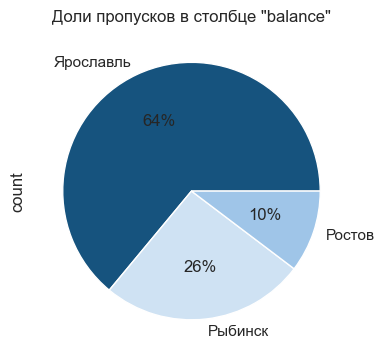

----------------------------------------------------------------------------------------------------
Изучение распределения пропусков в столбце "balance" по признаку: products


,products,count
1,1,1934
2,2,315
3,3,29
0,0,1


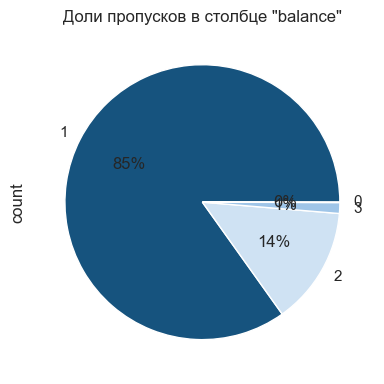

----------------------------------------------------------------------------------------------------
Изучение распределения пропусков в столбце "balance" по признаку: credit_card


,credit_card,count
1,1,1858
0,0,421


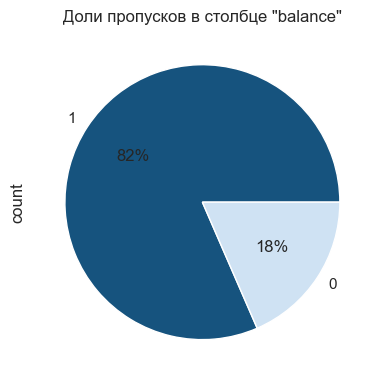

----------------------------------------------------------------------------------------------------


In [63]:
# сделаем срез датафрейма по пропускам в столбце с балансом
df_pass_balance = df[df['balance'].isnull() == True]

# обозначим столбцы для анализа
list = ['city', 'products', 'credit_card']

# применим вышенаписанную функцию
for column in list:
    pass_analysis(df_pass_balance, column)

Пропуски присутствуют во всех городах, но стоит отметить их большое количество в Ярославле (64%). Большая часть пропусков (85%) характерна для пользователей с одним продуктом, в том числе с кредитной картой (82% пользователей). 
\
\
Таким образом можно выделить несколько причин пропусков:
- техническая ошибка;
- наличие отрицательного баланса, в виду отсутсвия дебетового продукта в банке (так как отрицательные значения баланса в датафрейме отсутсуют).
\
Для дальнейшего анализа заполнять или удалять пропуски не будем.

---
<a id='change_types'></a> 
### Изменение типа данных
[Назад к оглавлению](#contens)

In [64]:
# изменим тип данных в столбце с возрастом на целочисленный
df['age'] = (df['age']).astype(int)

---
<a id='check_dubl'></a> 
### Проверка на наличие дубликатов
[Назад к оглавлению](#contens)

Первоначальная проверка показала отсутсвие явных дубликатов. Дополнительно проверим столбец с индентификаторами пользователей.

In [65]:
# посчитаем дубликаты
df['user_id'].duplicated().sum()

50

В датафрейме 50 дубликатов среди индентификаторов. Изучим их подробнее. Посмотрим на распределение пользователей повторяющихся id по оттоку.

In [66]:
# для составления сводной таблицы добавим дополнительный столбец с id
df_copy = df.copy()
df_copy['user_id_dupl'] = df_copy['user_id']

# составим сводную таблицу с дубликатами
id_dupl = (df_copy.pivot_table(index='user_id_dupl', values='user_id', aggfunc='count')
           .sort_values(by='user_id_dupl', ascending=False)
           .rename(columns={'user_id' : 'count'})
           .query('count > 1')
           .reset_index())

# для среза доавим id в лист
id_dupl_list = id_dupl['user_id_dupl'].tolist()

# срез по дубликатам
df_id_dupl = (df.query('user_id == @id_dupl_list')
                .sort_values(by='user_id', ascending=False))

# проверим количество ушедших и активных пользователей
df_id_dupl.pivot_table(index='churn', values='user_id', aggfunc='count')

,user_id
churn,
0,50
1,50


Предположение подтвердилось: скорее всего идентификаторы ушедших пользователей "перешли" к новым клиентам. Поэтому удалять их из датафрейма не будем.

---
<a id='anomaly'></a> 
### Исследование аномалий в данных
[Назад к оглавлению](#contens)

Сначала проверим нет ли аномальных значений в качественных признаках (город и пол).

In [67]:
# посмотрим на перечень городов для исследования
print('Города:', df['city'].unique())

# исследуем пол пользователей
print('Пол пользователей:', df['gender'].unique())

Города: ['Рыбинск' 'Ярославль' 'Ростов']
Пол пользователей: ['Ж' 'М']


В исследованных столбцах некорректных значений нет.
\
Посмотрим на стат. показатели числовых данных.

In [68]:
# изучим стат. показатели
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,974.00","9,974.00","9,974.00","9,974.00","7,695.00","9,974.00","9,974.00","9,974.00","9,974.00","9,974.00"
mean,"171,755.22",848.68,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,786.81",0.18
std,"33,695.53",65.40,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,285.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,760.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,251.66",0.00
50%,"172,643.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,626.79",0.00
75%,"201,163.75",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.81",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


**По таблице можно сделать следующие выводы:**
- баллы крелитного скорринга находятся в диапазоне от 642 до 1000;
- минимальный возраст пользователя банка - 18  лет (что соответсвует законодательству РФ), максимальный - 86;
- приблизительная оценка собственности распределена от 0 до 9;
- количество потребляемых продуктов разнится от 0 до 5;
- столбцы с данными о наличии кредитной карты, последней активности и оттоку клиентов корректны (0 и 1);
- поля с балансом и оценочной заработной платы требуют дополнительного внимания.
\
\
Посмотрим какое количество клиентов не пользуются продуктами банка.

In [69]:
# посчитаем количество клиентов с 0 продуктами
(df.pivot_table(index='products', values='user_id', aggfunc='count')
    .rename(columns={'user_id' : 'count'})
    .reset_index()
    .query('products == 0'))

,products,count
0,0,1


Такой клиент всего 1. Уберем его из исследования.

In [70]:
# удалим клиента без продуктов
df = df.query('products != 0')

Исследуем данные о **балансе пользователей**: посмотрим на распределение данных, изучим максимальное, минимальное, среднее значения и медиану.

count         7,695.00
mean        827,245.59
std       1,980,327.41
min               0.00
25%         295,698.71
50%         524,295.33
75%         980,051.21
max     119,113,552.01
Name: balance, dtype: float64

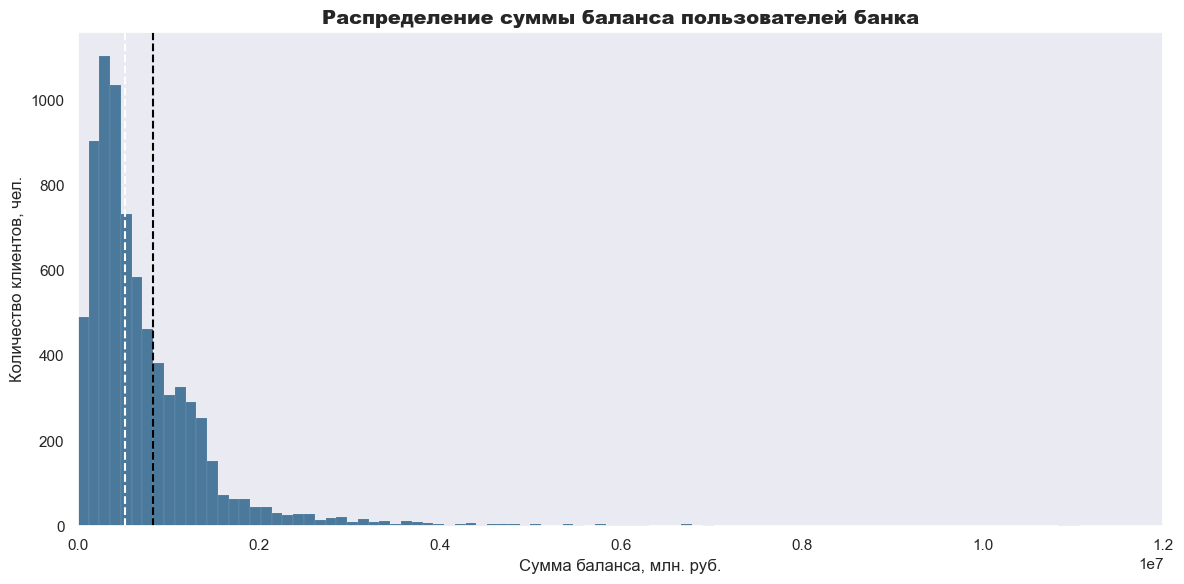

In [71]:
# посмотрим на стат. показатели поля
display(df['balance'].describe())

# для графика подсчитаем медиану и среднее 
balance_median = df['balance'].median()
balance_mean = df['balance'].mean()

# отразим данные на графике
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['balance'], bins=1000, legend=True)
ax.set_title('Распределение суммы баланса пользователей банка', size=14, weight= 900)
ax.set_ylabel('Количество клиентов, чел.')
ax.set_xlabel('Сумма баланса, млн. руб.')
plt.xlim([0, 12000000])
plt.axvline(x=df['balance'].median(), color='white', linestyle='--', label='Среднее медианное баланса')
plt.axvline(x=df['balance'].mean(), color='black', linestyle='--', label='Среднее баланса')
plt.tight_layout()
plt.show()

Минимальное значение баланса - 0, \
Максимальное значение - 119 млн. руб.\
Среднее значение - 827 тыс. руб.\
Медиана - 524 тыс. руб.\
Основная доля клиентов имеет баланс до 200 тыс. руб.
\
\
Для выбора границы для определения аномальных значений рассчитаем 90, 95 и 99  перцентили баланса клиентов. Для этого будем использовать сформированный ранее датафрейм без пропусков в поле с балансом.

In [72]:
# находит перцентили
per_balance_90 = np.percentile(df_no_pass_balance['balance'], [90])
per_balance_95 = np.percentile(df_no_pass_balance['balance'], [95])
per_balance_99 = np.percentile(df_no_pass_balance['balance'], [99])
print('90 перцентиль: %.2f' % (per_balance_90))
print('95 перцентиль: %.2f' % (per_balance_95))
print('99 перцентиль: %.2f' % (per_balance_99))

90 перцентиль: 1460133.71
95 перцентиль: 2114078.39
99 перцентиль: 4827211.16


Не более 10% пользователей имеют баланс, равный 1.46 млн. руб., не более 5% - 2.11 млн. руб., и не более 1% - 4.83 млн. руб.

Проделаем тоже самое для поля с **оценочной заработной платой.**

count       9,973.00
mean      147,799.12
std       139,287.08
min         2,546.30
25%        75,252.02
50%       119,643.06
75%       174,499.96
max     1,395,064.45
Name: est_salary, dtype: float64

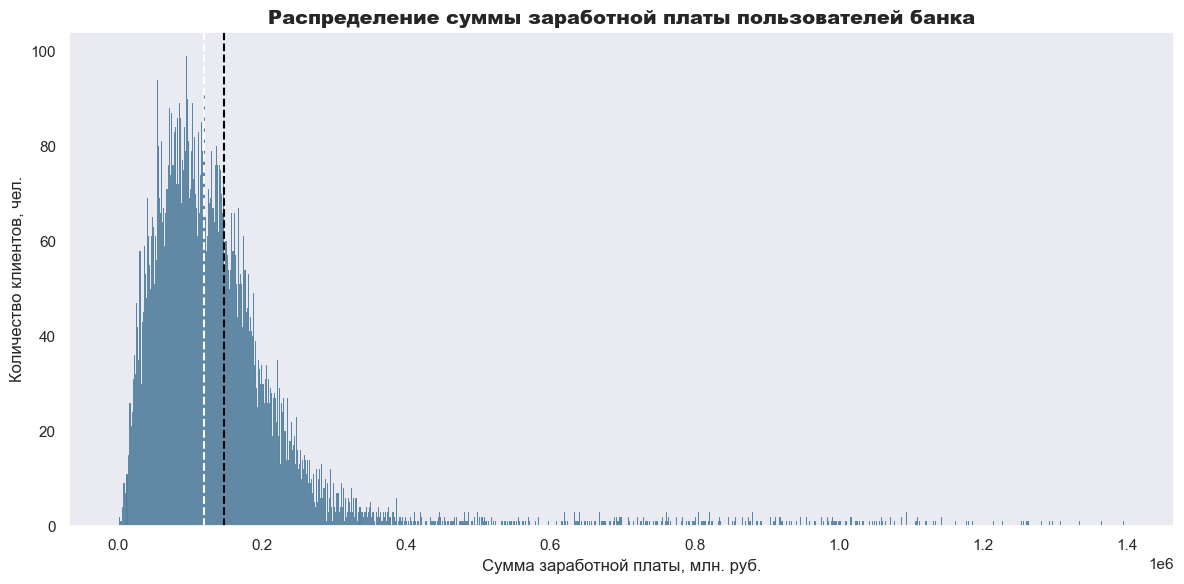

90 перцентиль: 242322.35
95 перцентиль: 316366.94
99 перцентиль: 886343.71


In [73]:
# посмотрим на стат. показатели поля
display(df['est_salary'].describe())

# отразим данные на графике
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['est_salary'], bins=1000)
ax.set_title('Распределение суммы заработной платы пользователей банка', size=14, weight= 900)
ax.set_ylabel('Количество клиентов, чел.')
ax.set_xlabel('Сумма заработной платы, млн. руб.')
plt.axvline(x=df['est_salary'].median(), color='white', linestyle='--', label='Среднее медианное заработной платы')
plt.axvline(x=df['est_salary'].mean(), color='black', linestyle='--', label='Среднее заработнйо платы')
plt.tight_layout()
plt.show()

# находит перцентили
per_salary_90 = np.percentile(df['est_salary'], [90])
per_salary_95 = np.percentile(df['est_salary'], [95])
per_salary_99 = np.percentile(df['est_salary'], [99])
print('90 перцентиль: %.2f' % (per_salary_90))
print('95 перцентиль: %.2f' % (per_salary_95))
print('99 перцентиль: %.2f' % (per_salary_99))

Минимальная заработная плата - 2.5 тыс. руб.\
Максимальная заработная плата - 1.4 мнл. руб.\
Среднее значение - 147.79 тыс. руб.\
Медиана - 119.63 тыс. руб.\
Не более 10% пользователей имеют заработную плату, равную 242.29 тыс. руб., не более 5% - 316.36 тыс. руб., и не более 1% - 886.32 тыс. руб.

Для среза данных по балансу и заработной плате выберем 90 перцентиль и сформируем переменные для удобства.

In [74]:
# формируем переменные
lim_balance = int(per_balance_90[0])
lim_salary = int(per_salary_90[0])

Проверим сколько данных после предобработки осталось.

In [75]:
# посчитаем количество записей и долю после предобработки данных
print('Количество записей после предобработки:', len(df))
print(f'Доля записей после предобработки: {(len(df)/10000):.2%}')

Количество записей после предобработки: 9973
Доля записей после предобработки: 99.73%


---
**В процессе предобработки данных** были выполнены следующие действия:
- откорректированы названия некоторых столбцов;
- изменен тип данных в столбце с возрастом;
- удалены пропуски в столбце с возрастом, изучены пропуски в поле с балансом клиентов;
- обнаружены и исследованы дубликаты по идентификаторам пользователей;
- проверены данные на корретное заполнение;
- изучены аномальные значения в полях с балансом и заработной платой;
- сформированы переменные для среза по балансу и заработной плате.
\
\
В процессе предобработки были удалено 0.17% данных.


---
<a id='eda'></a> 
## Исследовательский анализ данных
[Назад к оглавлению](#contens)

---
<a id='portrait'></a> 
### Портрет типичных клиентов
[Назад к оглавлению](#contens)

Составим портреты активных и отточных клиентов банка.

In [76]:
# составим таблицу по действующим и бывшим клиентам у обычных клиентов
churn_diff = df.groupby('churn')[['score', 'age', 'equity', 'balance', 
                                  'products', 'credit_card', 'last_activity', 'est_salary']].agg(['mean', 'median']).T
churn_diff['difference'] = churn_diff[0]-churn_diff[1]
churn_diff

churn                         0            1  difference
score         mean       845.40       863.36      -17.97
              median     848.00       866.00      -18.00
age           mean        43.02        41.43        1.59
              median      40.00        39.00        1.00
equity        mean         2.38         3.76       -1.39
              median       3.00         4.00       -1.00
balance       mean   733,031.63 1,134,458.21 -401,426.58
              median 475,410.09   783,908.90 -308,498.81
products      mean         1.76         2.38       -0.62
              median       2.00         2.00        0.00
credit_card   mean         0.71         0.55        0.16
              median       1.00         1.00        0.00
last_activity mean         0.48         0.70       -0.22
              median       0.00         1.00       -1.00
est_salary    mean   147,674.64   148,357.48     -682.85
              median 118,227.60   125,408.88   -7,181.28

По таким показателям как скорринговый балл, оценка собственности, количество продуктов, баланс и заработная плата, отточные клиенты выигрывают и показывают лучшие результаты. Только по наличию кредитной карты активных пользователей на 16% больше ушедших. Средний возраст близок у обоих групп (43 и 41 года). \
Отточные клиенты отличаются большей суммой на балансе и заработной платой.

---
<a id='distribution'></a> 
### Анализ распределения количественных и качественных признаков клиентов банка
[Назад к оглавлению](#contens)

Создадим словари со столбцами количественных и качественных признаков и их наименований. Отдельно исследуем баланс и заработную плату.

In [77]:
# формируем словари       
quantity_dict = {'score': 'Баллы кредитного скоринга',
                 'age': 'Возраст',
                 'equity': 'Приблизительная оценка собственности',
                 'products': 'Количество потребляемых продуктов'
}

category_dict = {'city': 'Город',
                 'gender': 'Пол',
                 'credit_card': 'Наличие кредитной карты',
                 'last_activity': 'Активность в последнее время',
}                           

<a id='quantity_plot_use'></a> 
Посмотрим на распределение признаков у клиентов банка с учетом оттока пользователей.\
Для этого применим вышесозданные функции.\
[Функция для диаграмм количественных признаков](#quantity_plot)\
[Функция для диаграмм качественных признаков](#category_plot)

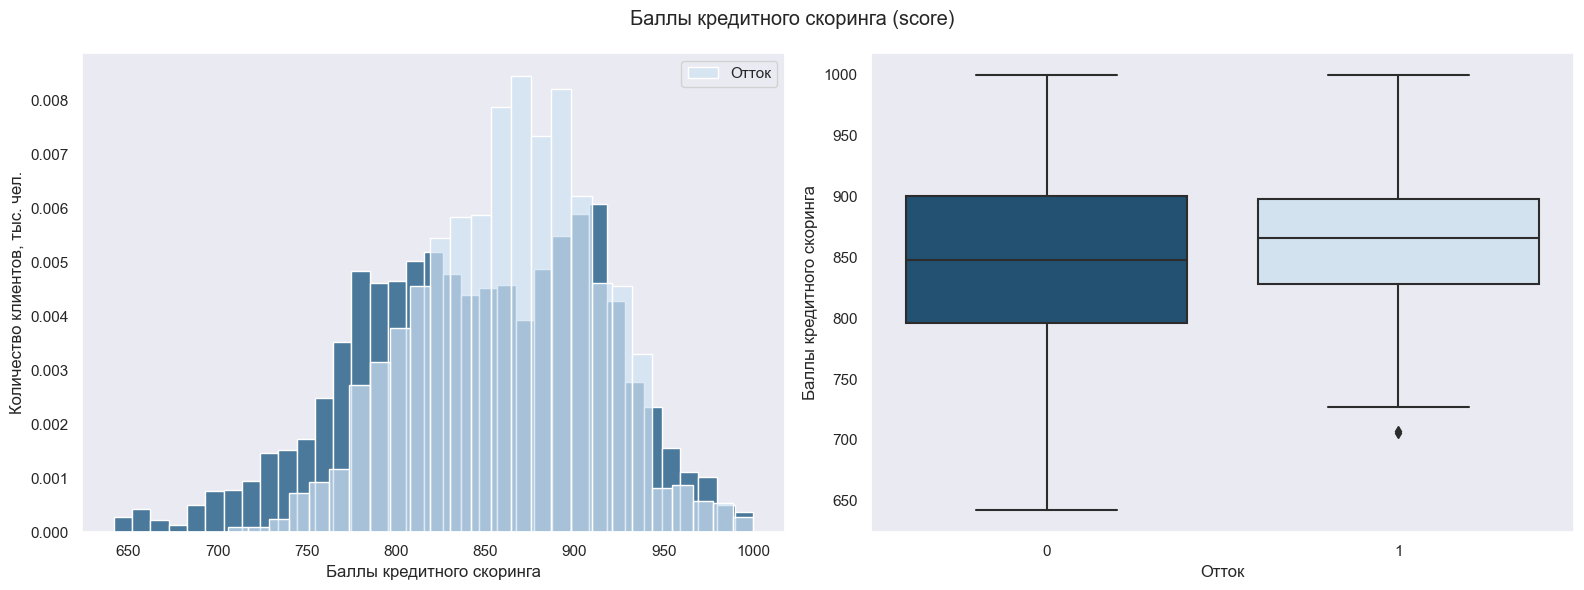

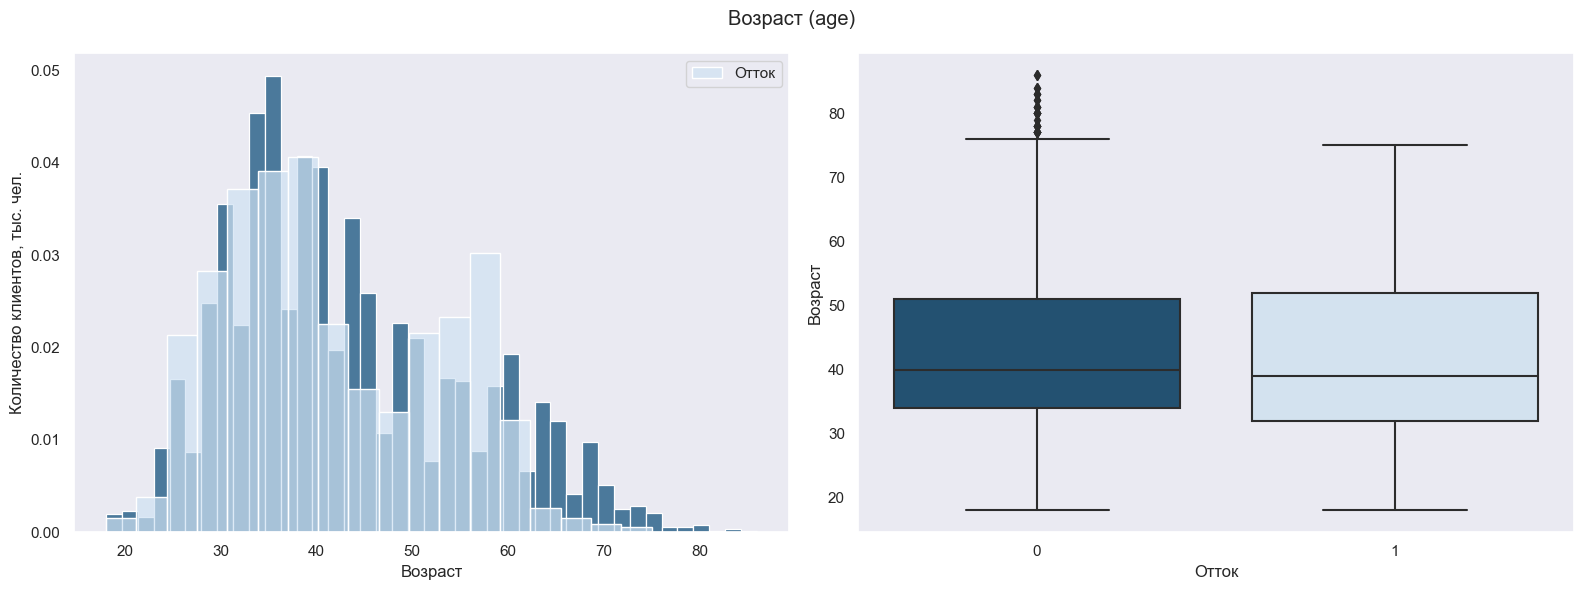

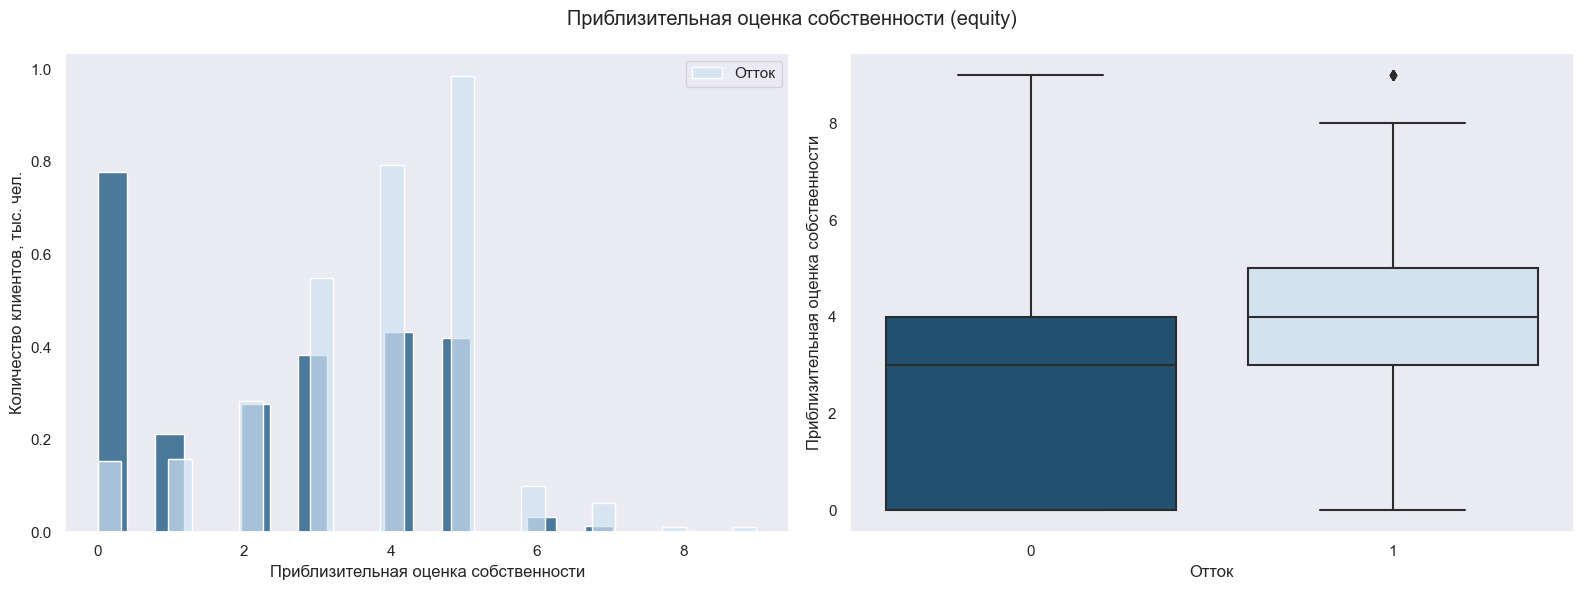

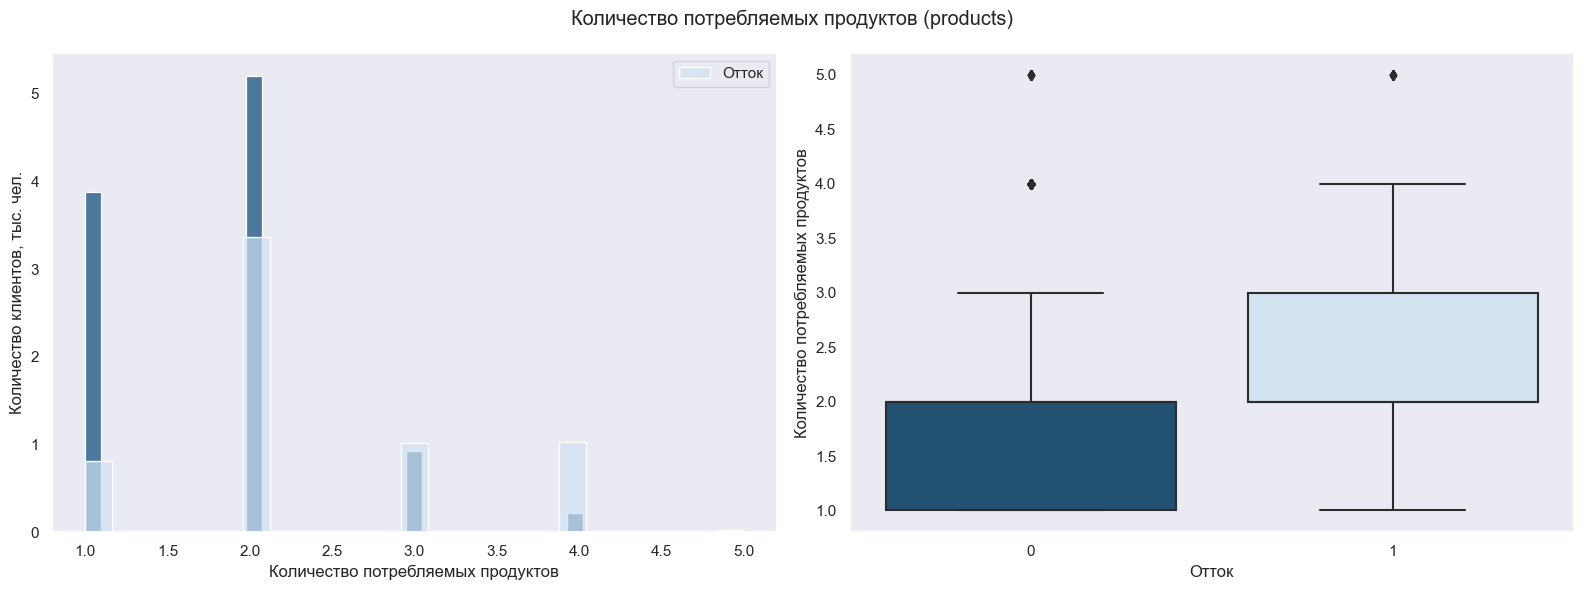

In [78]:
# применим функцию для количественных признаков
for column, column_name in quantity_dict.items():
     quantity_plot(df, column, column_name)

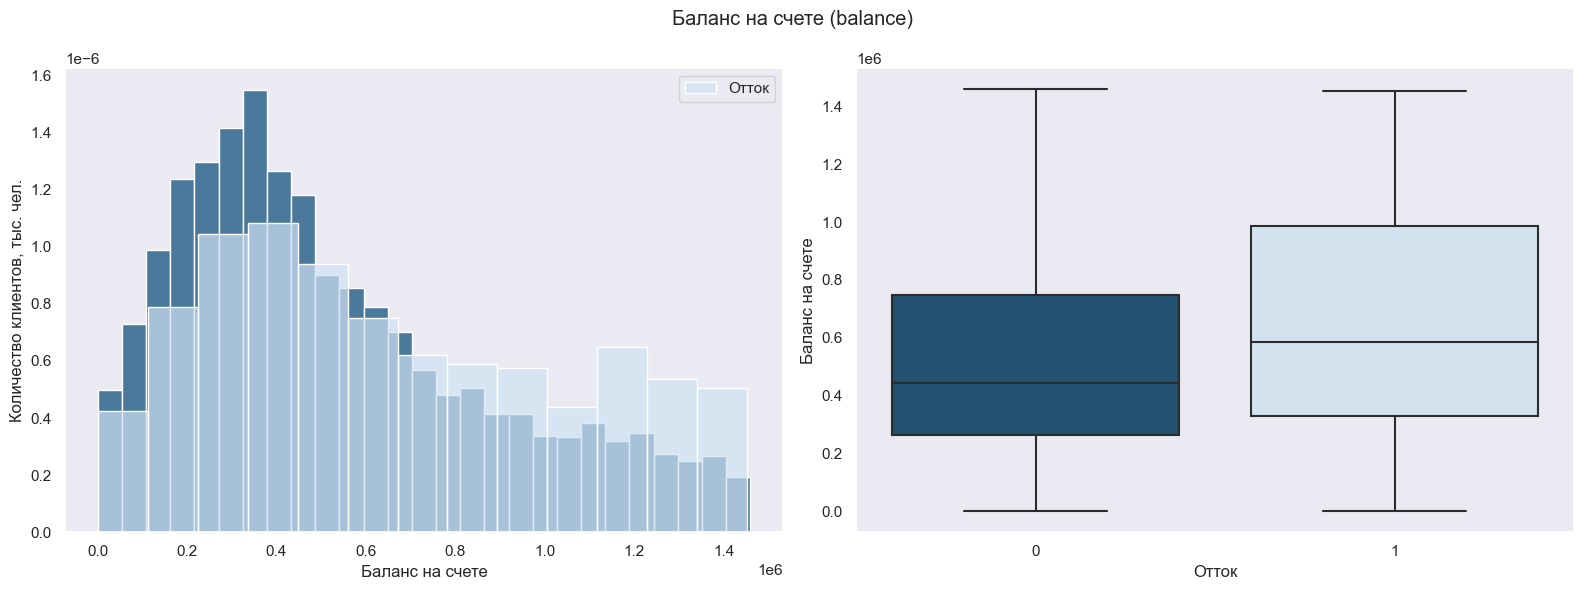

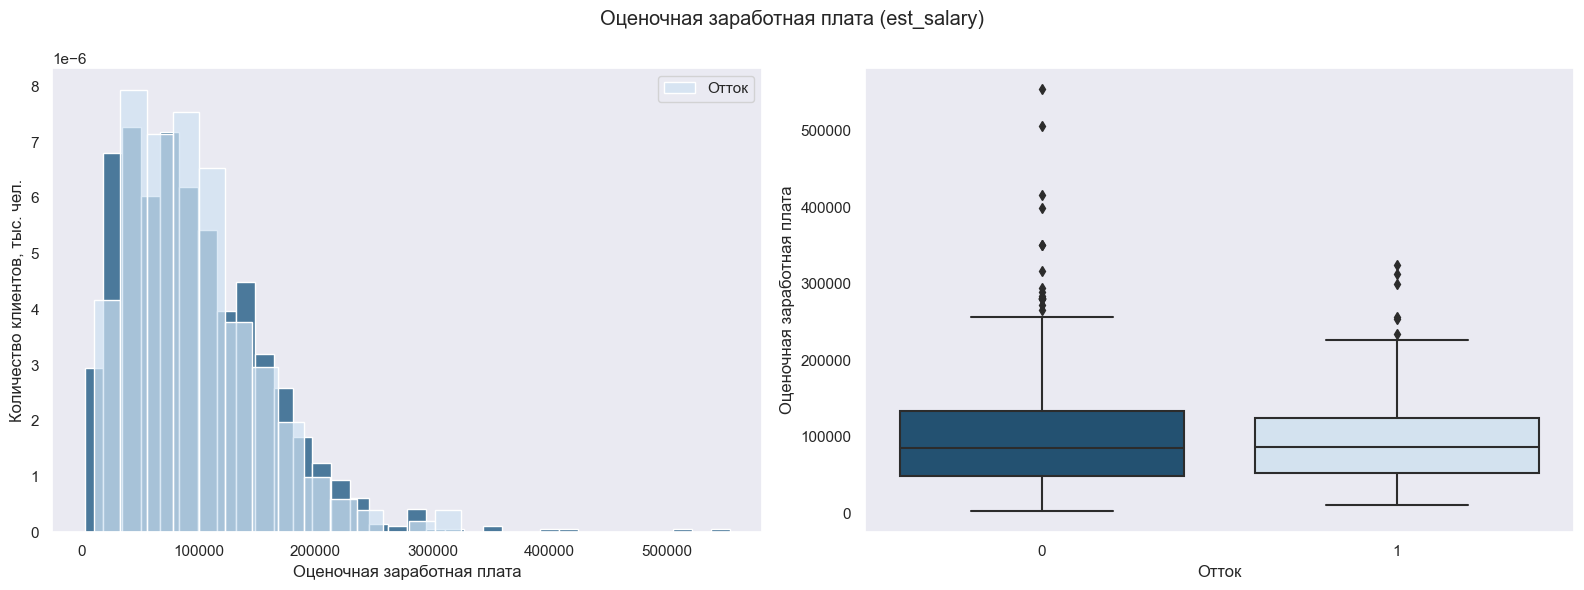

In [79]:
# исследуем баланс и заработную плату
# cформируем датасеты со срезами по 90 перцентилю по показателям
df_lim_balance = df.query('balance <= @lim_balance')
df_lim_salary = df.query('balance <= @lim_salary ')

# применим функцию
quantity_plot(df_lim_balance, 'balance', 'Баланс на счете')
quantity_plot(df_lim_salary, 'est_salary', 'Оценочная заработная плата')

<a id='category_plot_use'></a> 

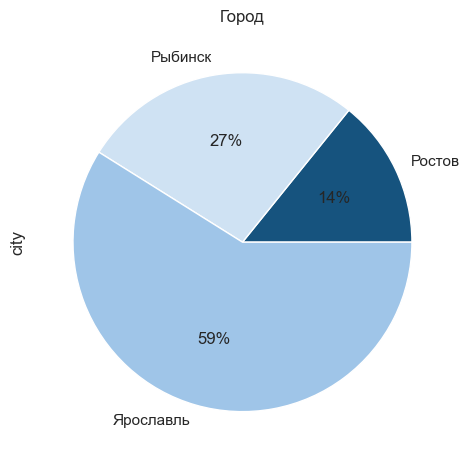

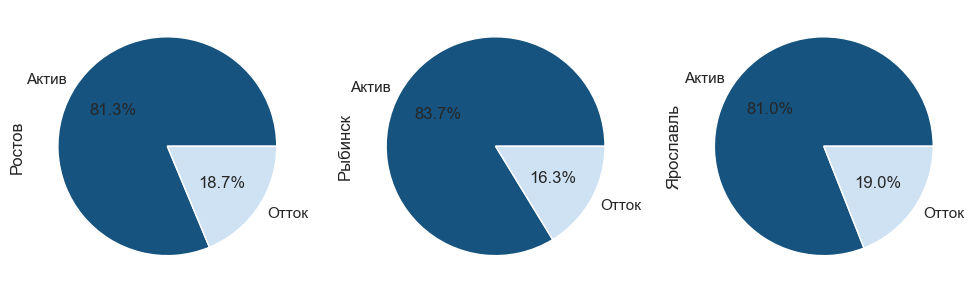

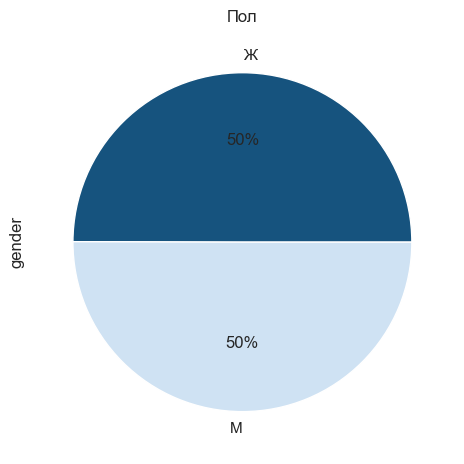

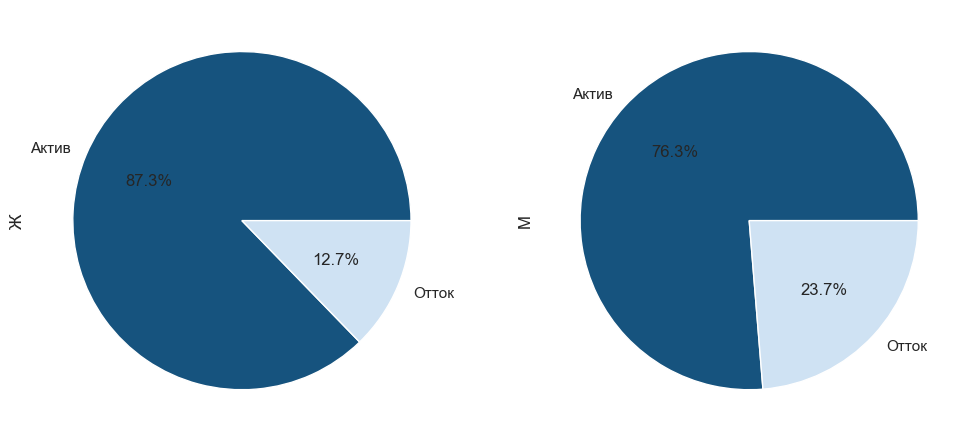

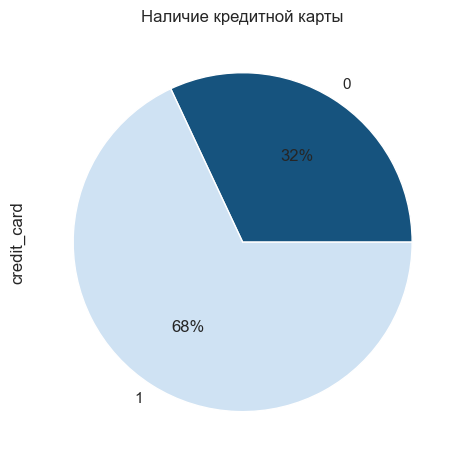

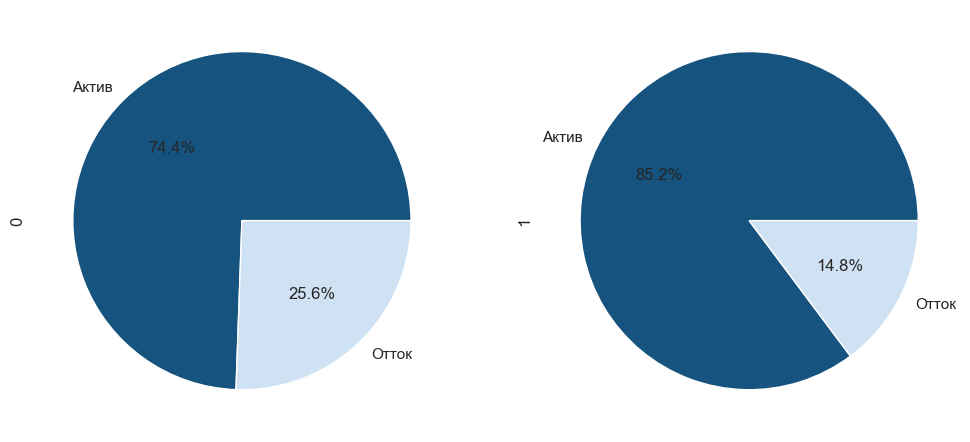

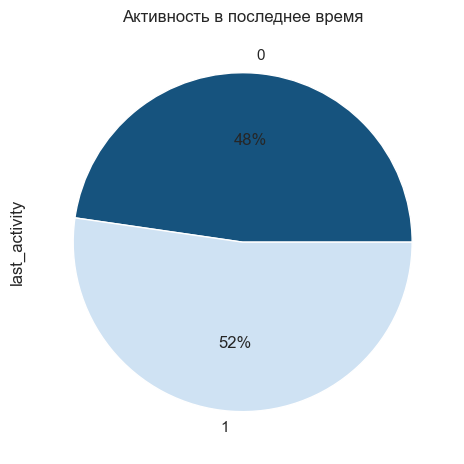

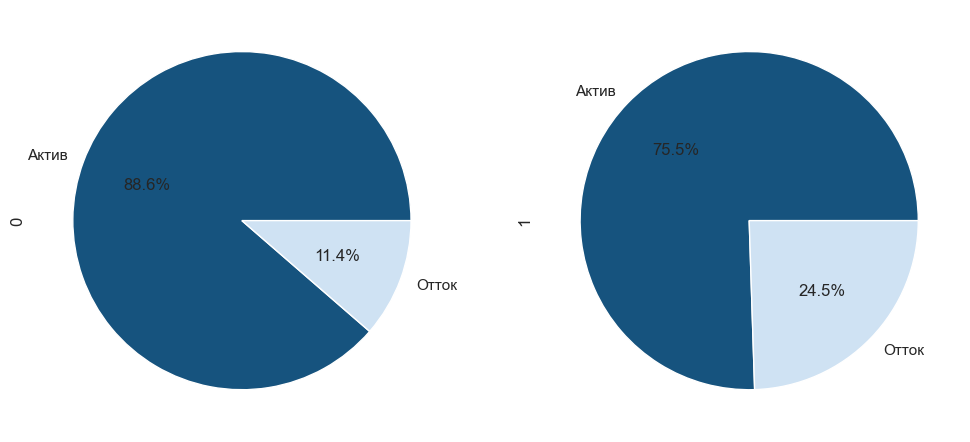

In [80]:
# применим функцию для качественных признаков
for column, column_name in category_dict.items():
     category_plot(df, column, column_name)

**По графикам можно сделать следующие выводы.**


В основным отточными клиентыми являются пользователи со следующими характеристиками:
- скорринговые баллы: 830 - 910
- возраст: 32, 48 и 50-60
- оценка собственности: 3 и выше
- количество потребляемых продуктов: 3 и более
- баланс: более 700 тыс. руб.
- заработная плата: 50 - 150 тыс. руб
- пол: муж.
- город проживания: Ярославль 
- наличие кредитной карты: нет
- активные в последнее время.

---
<a id='corr'></a> 
### Корреляционный анализ данных
[Назад к оглавлению](#contens)

Ддя оценки влияния признаков на отток клиентов проведем корреляционный анализ. Для этого преобразуем категориальные переменные (город, пол) и новые категории в бинарный формат. 

In [81]:
# преобразуем категориальные переменные (город, пол) в бинарный формат для дальнейшего анализа
df_corr = df.copy()
df_corr = pd.get_dummies(df_corr, columns=['city', 'gender'], drop_first=False)

# переименуем созданные поля для удобства
df_corr = df_corr.rename(columns={
                        'city_Ростов' : 'Ростов',
                        'city_Рыбинск' : 'Рыбинск',
                        'city_Ярославль' : 'Ярославль',
                        'gender_Ж' : 'Ж',
                        'gender_М' : 'М',
                })

Посчитаем средний уровень оттока клиентов.

In [82]:
# посчитаем средний уровень оттока
avg_corr = len(df.query('churn == 1'))/len(df)
print(f'Средний отток клиентов: {avg_corr:.2%}')

Средний отток клиентов: 18.23%


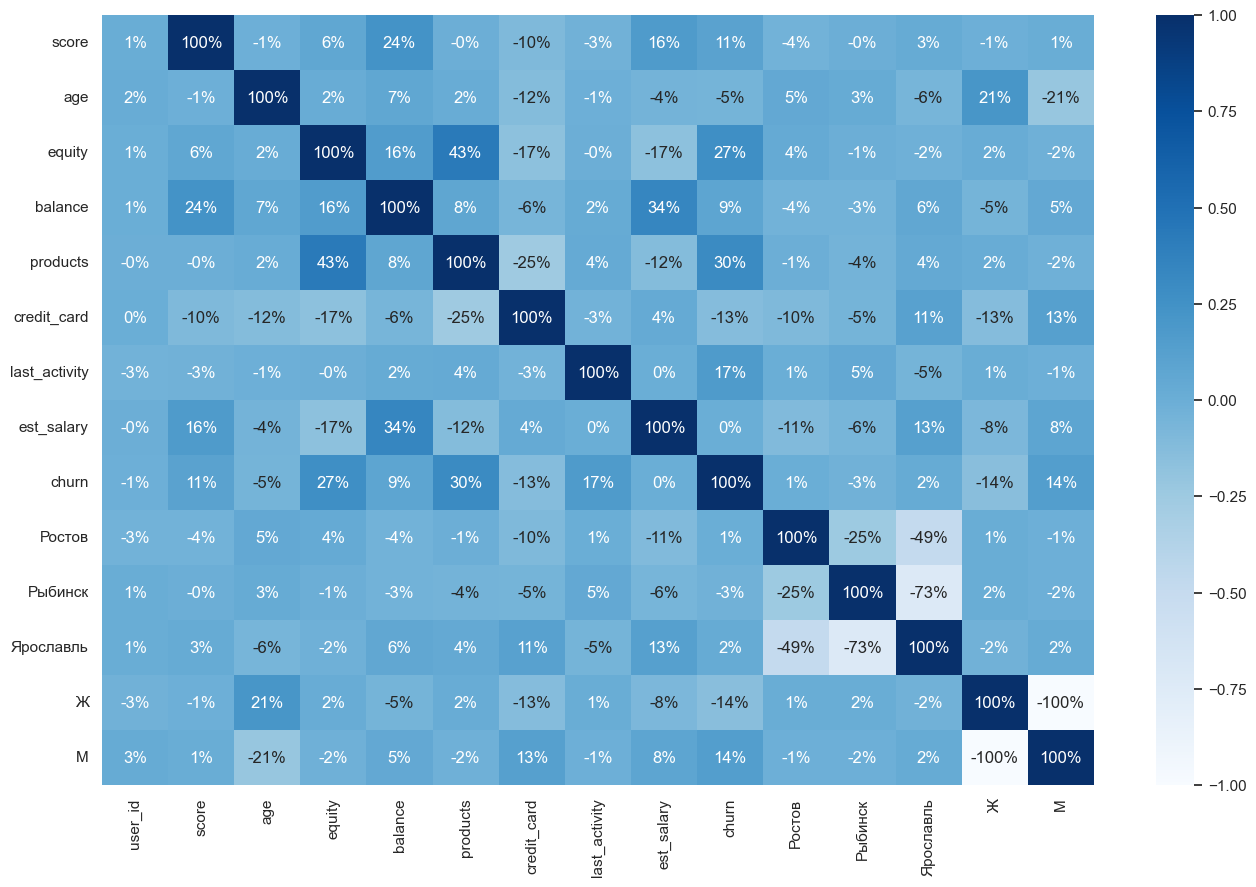

In [83]:
# формируем матрицу корреляции для основного датафрейма
corr_table = df_corr.corr()
corr_table = corr_table.drop(['user_id'])
plt.figure(figsize=(16, 10))
sns.heatmap(corr_table, annot=True, fmt='.0%', cmap='Blues', center=0) 
plt.show()

По шкале Чеддока можно сделать вывод о слабой корреляции между признаками. 
Наибольшее влияние на отток оказывают: оценка объектов собственности (27%) и количество потребляемых продуктов (30%) 
Также слабая положительная корреляция характерна для следующих показателей: 
- недавняя активность (17%)
- мужской пол (14%)
- баллы скорринга (11%)
- баланс (9%)
- город Ярославль (2%) и Ростов (1%).


---
<a id='hypothesis'></a> 
### Проверка статистических гипотез
[Назад к оглавлению](#contens)

---
<a id='hypothesis1'></a> 
#### Гипотеза №1
[Назад к оглавлению](#contens)

Н0: Средний возраст клиентов, использующих один продукт банка, равен среднему возрату клиентов, которые используют два продукта.\
Н1: Средний возраст клиентов, использующих один продукт банка, не равен среднему возрату клиентов, которые используют два продукта.

In [84]:
# сформируем датафреймы по группам
product_1 = df[df['products'] == 1]
product_2 = df[df['products'] == 2]
print('Количество клиентов, использующих 1 продукт:', len(product_1))
print('Количество клиентов, использующих 2 продукта:', len(product_2))

Количество клиентов, использующих 1 продукт: 3323
Количество клиентов, использующих 2 продукта: 5119


Для проверки будем использовать критерий Манна-Уитни, основное преимущество которого состоит в том, что мы отказываемся от предположения нормальности распределения.

In [85]:
# критический уровень статистической значисмости
alpha = .05

# results = вызов метода для проверки гипотезы
results = st.mannwhitneyu(product_1['age'], product_2['age'])

# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)    # тест двухсторонний

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.057138410813417605
Не получилось отвергнуть нулевую гипотезу


Проверка позволяет сделать вывод о том, что средний возраст пользователей 1го и 2х продуктов банка не различается.

---
<a id='hypothesis2'></a> 
#### Гипотеза №2
[Назад к оглавлению](#contens)

Н0: Средний уровень заработной платы у действующих клиентов равен среднему уровню заработной платы у отточных клиентов.\
Н1: Средний уровень заработной платы у действующих клиентов не равен среднему уровню заработной платы у отточных клиентов.

In [86]:
# сформируем датафреймы по группам
churn_0 = df[df['churn'] == 0]
churn_1 = df[df['churn'] == 1]
print('Количество активных клиентов:', len(churn_0))
print('Количество отточных клиентов:', len(churn_1))

Количество активных клиентов: 8155
Количество отточных клиентов: 1818


Н0: Средний уровень заработной платы у отточных пользователей 3 продуктов равен среднему уровню заработной платы у отточных пользователей 4х и более продуктов.\
Н1: Средний уровень заработной платы у отточных пользователей 3 продуктов не равен среднему уровню заработной платы у отточных пользователей 4х и более продуктов.

In [87]:
# сформируем датафреймы по группам
prod_3 = df.query('products == 3 & churn == 1')
prod_4 = df.query('products >= 4 & churn == 1')
print('Количество отточных пользователей 3 продуктов:', len(prod_3))
print('Количество отточных пользователей 4 и более продуктов:', len(prod_4))

Количество отточных пользователей 3 продуктов: 297
Количество отточных пользователей 4 и более продуктов: 308


In [88]:
# критический уровень статистической значисмости
alpha = .05

# results = вызов метода для проверки гипотезы
results = st.mannwhitneyu(prod_3['est_salary'], prod_4['est_salary'])

# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)    # тест двухсторонний

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.7537911898733862e-06
Отвергаем нулевую гипотезу


Проверка показала, что средний размер заработной платы у отточных пользователей 3 и 4+ продуктов различается.

---
<a id='segmentation'></a> 
### Сегментация пользователей
[Назад к оглавлению](#contens)

**Основная задача проекта - это сегментация пользователей по количеству потребляемых продуктов.** Поэтому проведем сегментацию по этому показателю, посмотрим на отточность в сегментах и подробнее изучим каждый сегмент для более точечного и эффективного маркетингового воздействия.
\
\
Посмотрим на количество клиентов в разрезе по количеству потребляемых продуктов.

,products,count
1,2,5119
0,1,3323
2,3,1038
3,4,474
4,5,19


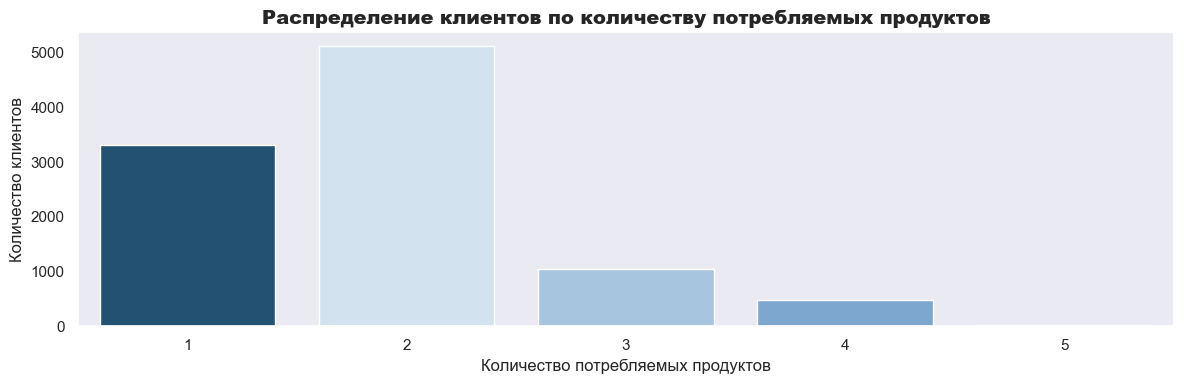

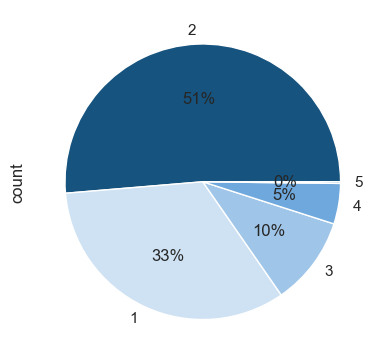

In [89]:
# строим таблицу
group_prod = (df.groupby('products', as_index=False)['user_id'].agg('count')
               .sort_values(by='user_id', ascending=False)
               .rename(columns={'user_id' : 'count'}))
display(group_prod)

# отразим распределение на графике
plt.figure(figsize=(12, 4))
ax = sns.barplot(y='count', x='products', data=group_prod)
ax.set_title('Распределение клиентов по количеству потребляемых продуктов', size=14, weight= 900)
ax.set_xlabel('Количество потребляемых продуктов')
ax.set_ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

# отобразим распределение по долям на круговой диаграмме
group_prod.plot(y='count',
            kind='pie',
            labels=group_prod['products'],
            autopct='%.0f%%',
            figsize=(4, 4),
            legend=False)
plt.tight_layout()
plt.show()

Основная доля клиентов (более 80%) пользуется 1 или 2 продуктами.\
Так как 5-я группа малочисленна (всего 19 человек), сформируем для анализа следующие группы:
- А: пользователи 1 продукта
- В: пользователи 2х продуктов
- С: пользователи 3х продуктов
- D: пользователи 4х и более продуктов.

[Функция для категоризации по количеству продуктов](#categorize_products)
<a id='categorize_products_use'></a> 

,products,count
0,A,3323
1,B,5119
2,C,1038
3,D,493


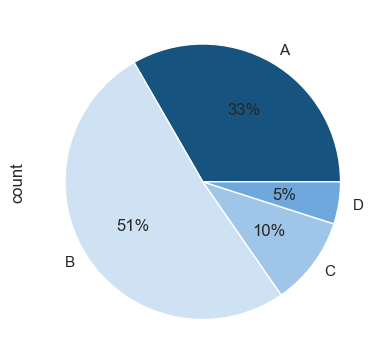

In [90]:
# для дальнейшего анализа создаем копию датасета
df_prod = df.copy()

# применяем функцию
df_prod['products'] = df_prod['products'].apply(categorize_products)

# посмотрим на численность в группах
segment = (df_prod.groupby('products', as_index=False)['user_id'].agg('count')
                  .rename(columns={'user_id' : 'count'}))
display(segment)

# отобразим распределение по долям на круговой диаграмме
segment.plot(y='count',
            kind='pie',
            labels=segment['products'],
            autopct='%.0f%%',
            figsize=(4, 4),
            legend=False)
plt.tight_layout()
plt.show()

Изучим подбронее выделенные сегменты.


[Функция для построения графиков количестченных признаков по продуктам](#quantity_product_plot)
<a id='quantity_product_plot_use'></a> 

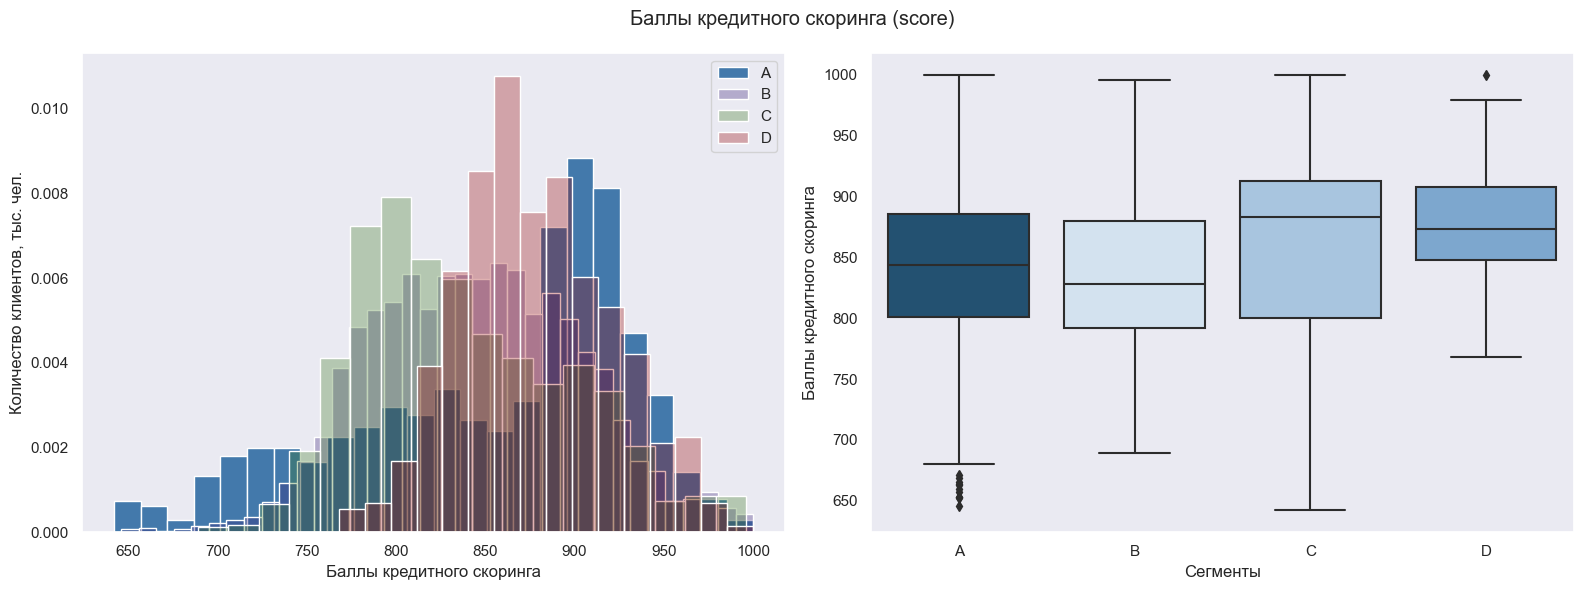

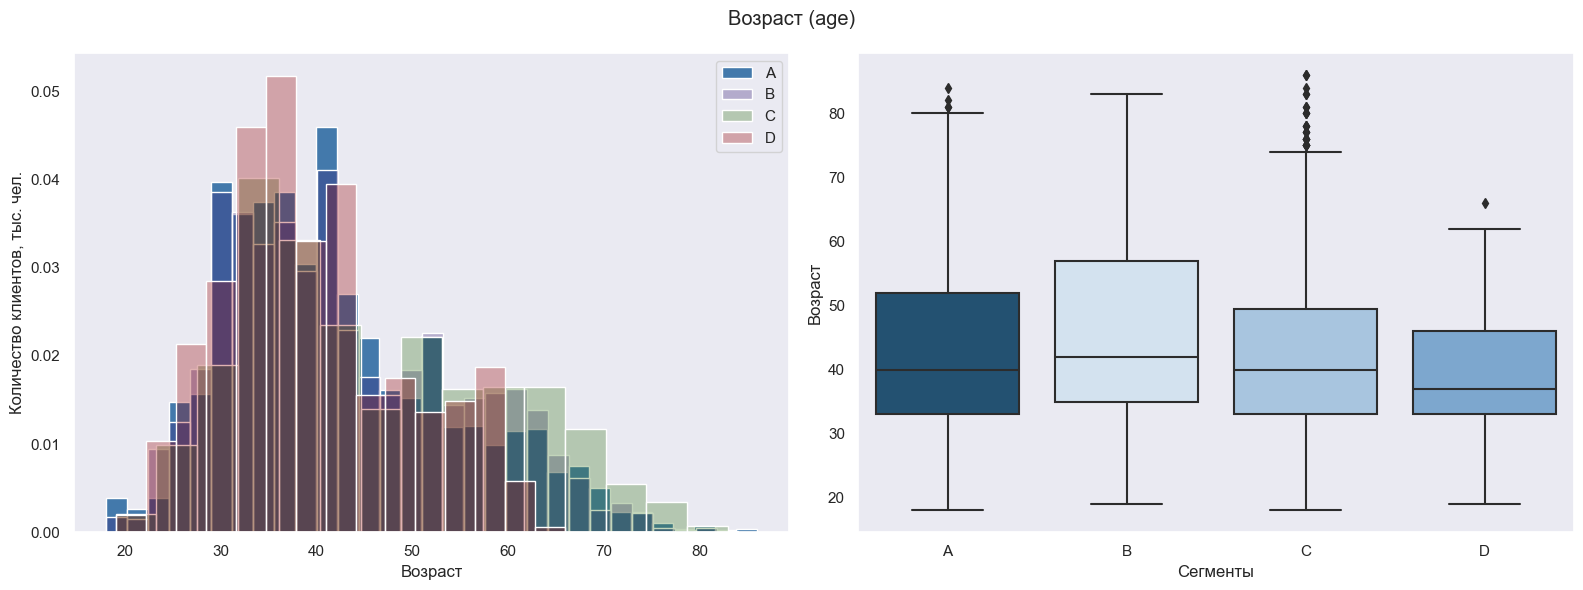

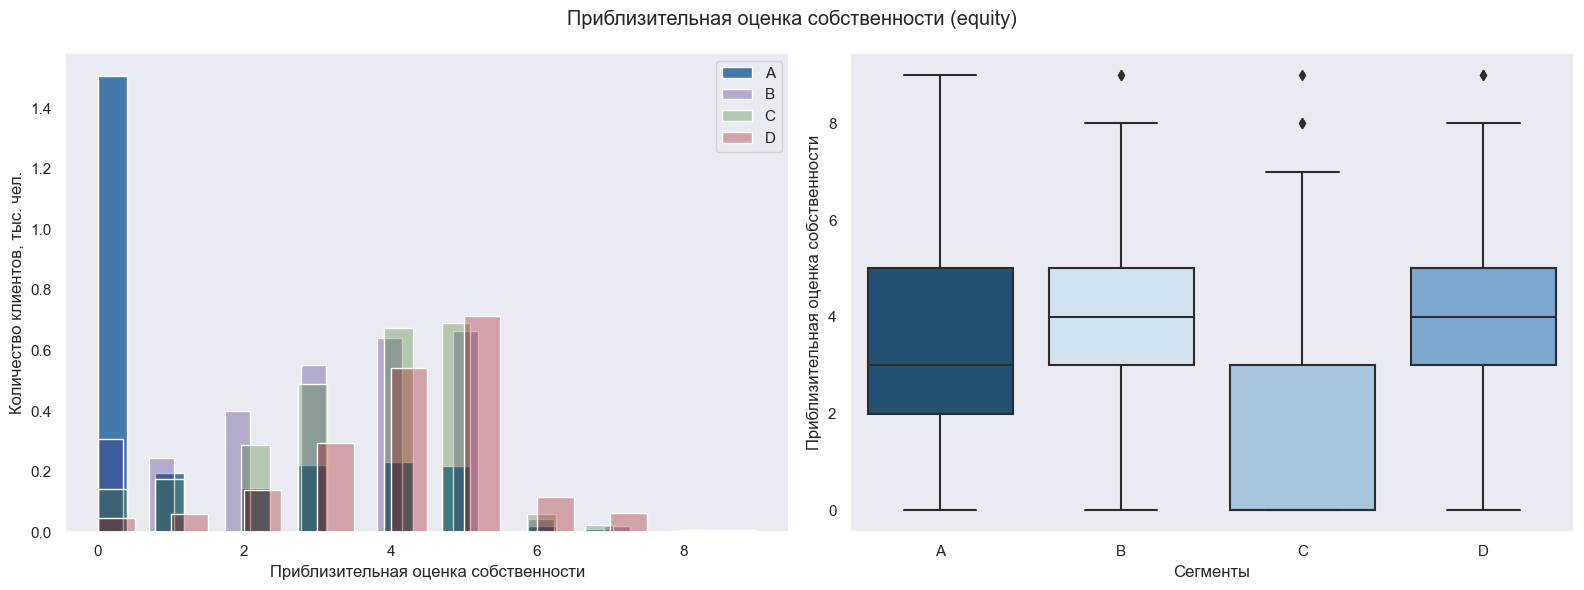

In [91]:
# формируем словари       
q_dict = {'score': 'Баллы кредитного скоринга',
          'age': 'Возраст',
          'equity': 'Приблизительная оценка собственности',
}

c_dict = {'city': 'Город',
          'gender': 'Пол',
          'credit_card': 'Наличие кредитной карты',
          'last_activity': 'Активность в последнее время',
          'churn': 'Отток',
}       

# применим функцию для количественных признаков
for column, column_name in q_dict.items():
     quantity_product_plot(df_prod, column, column_name)

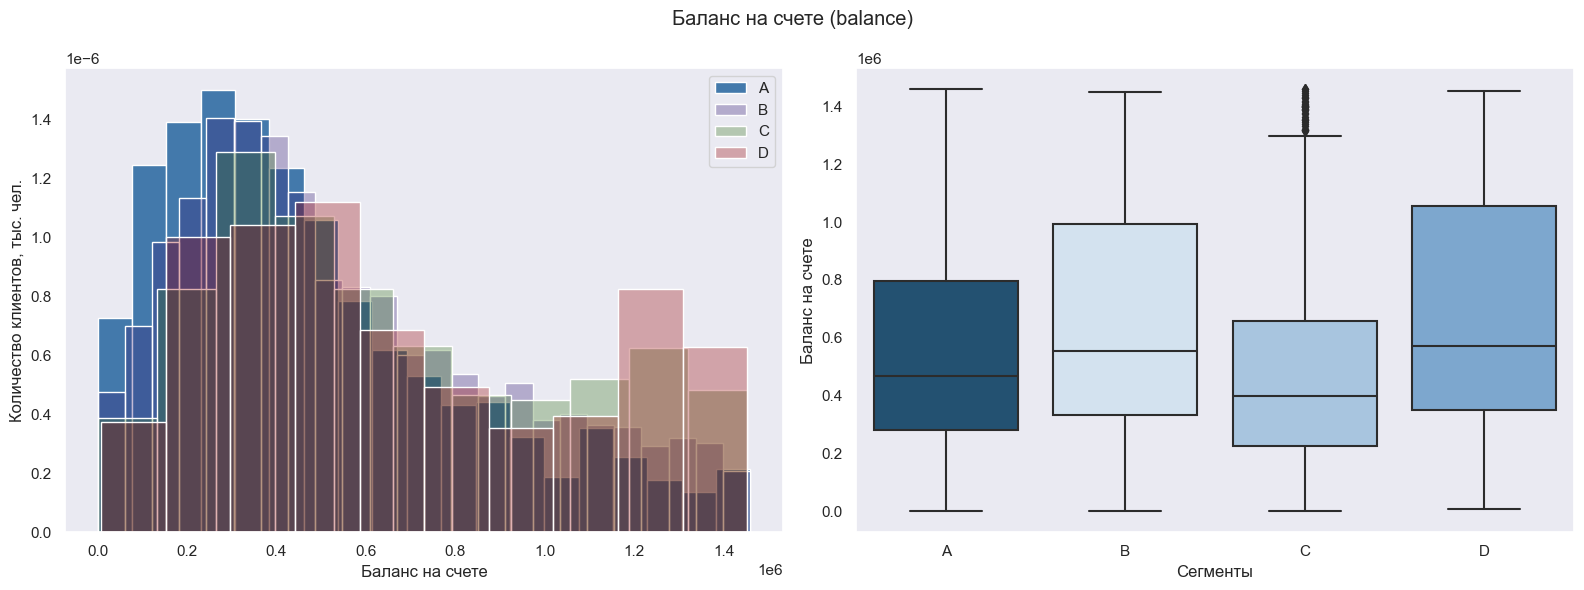

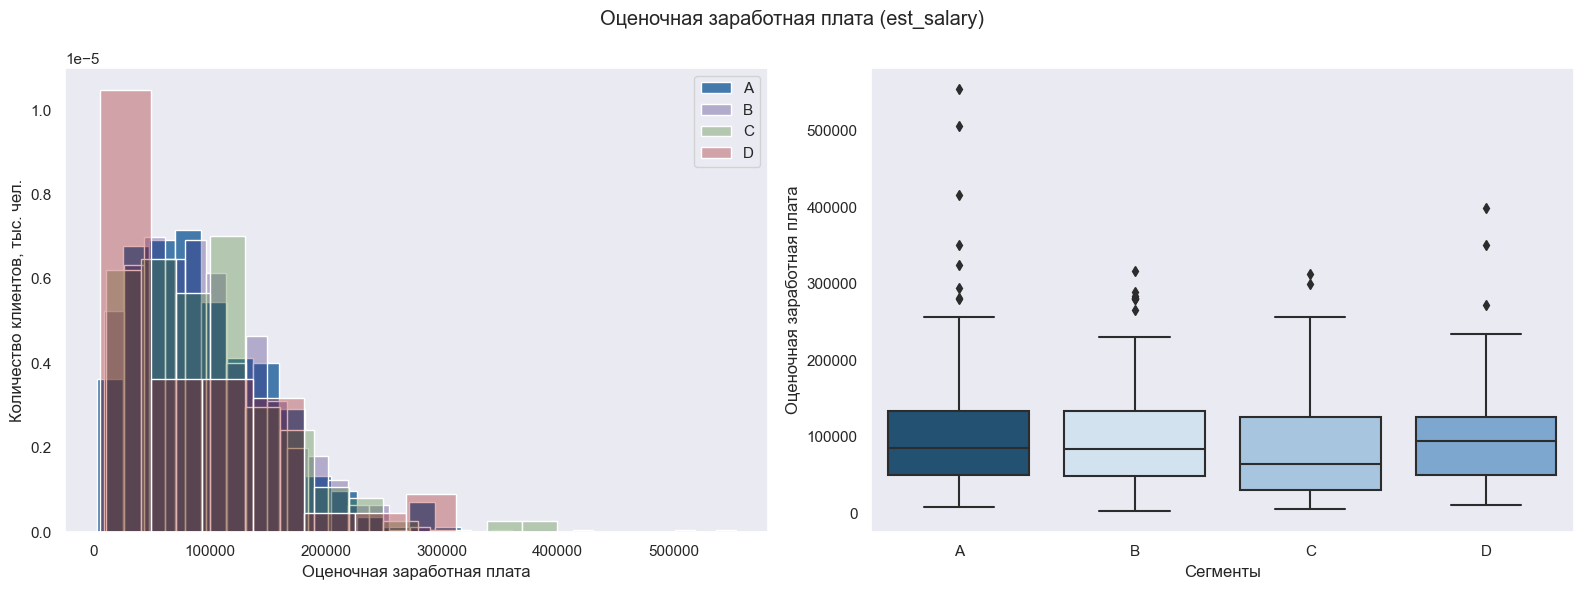

In [92]:
# исследуем баланс и заработную плату
# cформируем датасеты со срезами по 90 перцентилю по показателям
df_lim_balance = df_prod.query('balance <= @lim_balance')
df_lim_salary = df_prod.query('balance <= @lim_salary ')

# применим функцию
quantity_product_plot(df_lim_balance, 'balance', 'Баланс на счете')
quantity_product_plot(df_lim_salary, 'est_salary', 'Оценочная заработная плата')

[Функция для построения графиков качественных признаков по продуктам](#category_product_plot)
<a id='category_product_plot_use'></a> 

Распределение в разрезе количества продуктов клиентов по признаку: Город


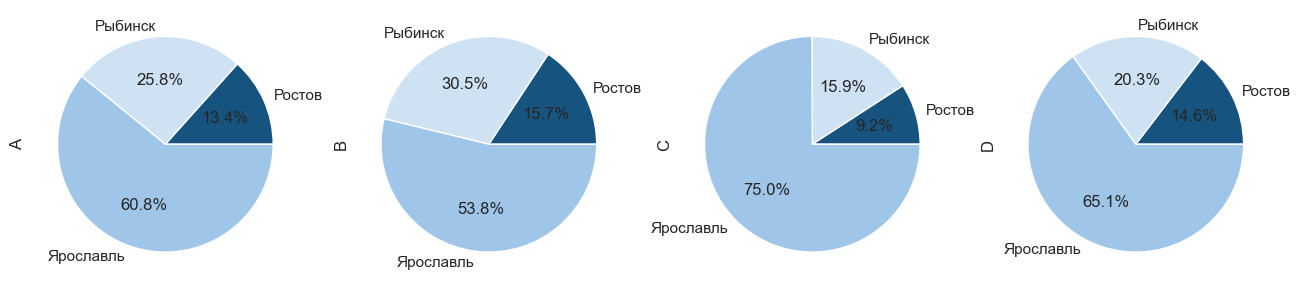

Распределение в разрезе количества продуктов клиентов по признаку: Пол


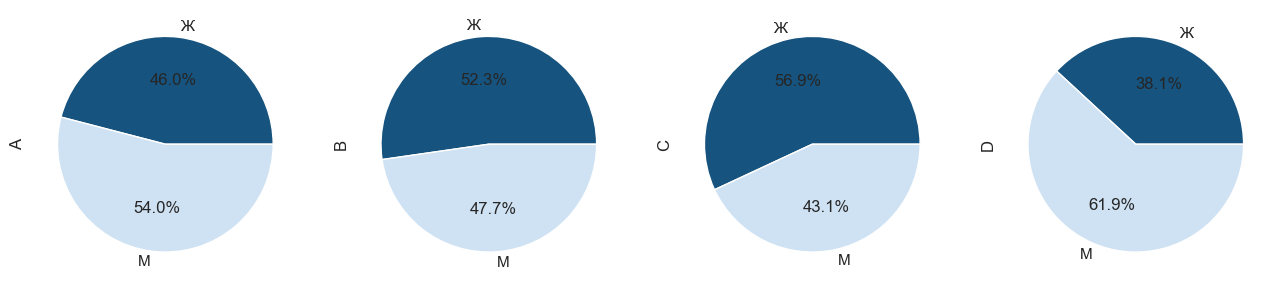

Распределение в разрезе количества продуктов клиентов по признаку: Наличие кредитной карты


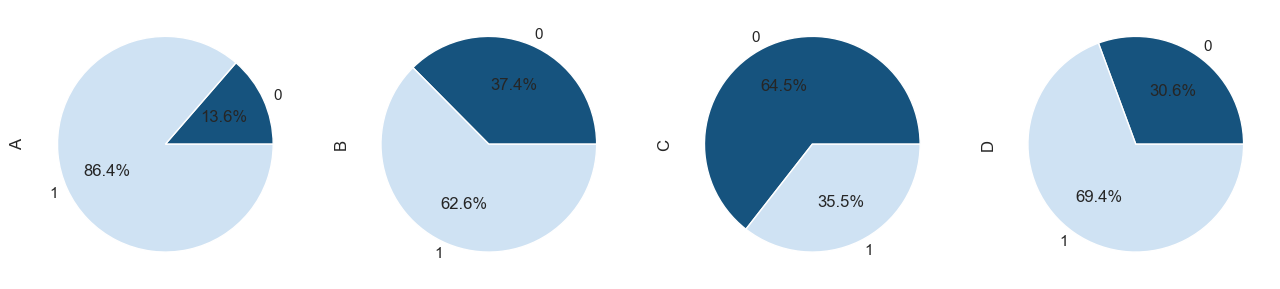

Распределение в разрезе количества продуктов клиентов по признаку: Активность в последнее время


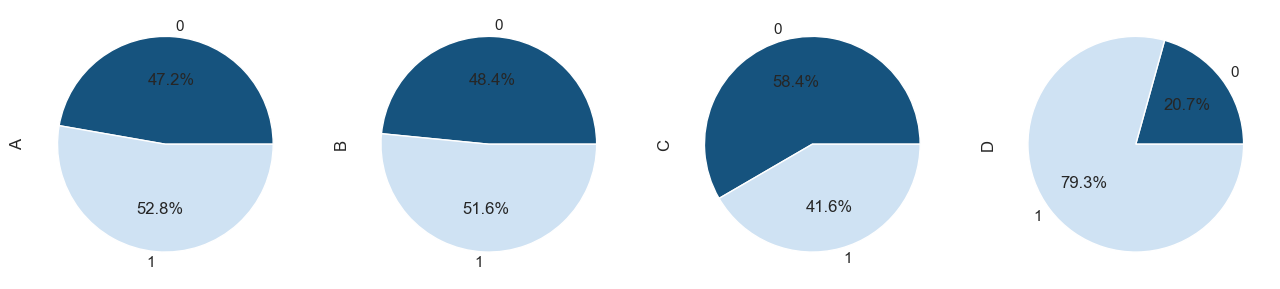

Распределение в разрезе количества продуктов клиентов по признаку: Отток


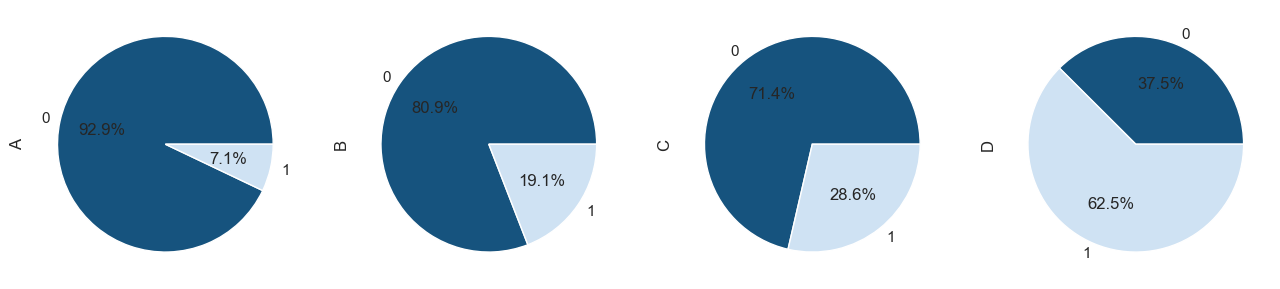

In [93]:
# применим функцию для количественных признаков
for column, column_name in c_dict.items():
     category_product_plot(df_prod, column, column_name)

In [94]:
# посмотрим на средние показатели по сегментам
df_prod.pivot_table(index='products', aggfunc='mean')

,age,balance,churn,credit_card,equity,est_salary,last_activity,score,user_id
products,,,,,,,,,
A,42.20,"611,006.20",0.07,0.86,1.33,"180,605.23",0.53,854.30,"171,995.75"
B,42.77,"812,152.00",0.19,0.63,3.15,"130,400.38",0.52,844.56,"171,475.32"
C,45.71,"993,888.30",0.29,0.36,3.52,"128,697.01",0.42,837.24,"172,952.86"
D,39.66,"1,242,506.49",0.62,0.69,4.13,"147,550.41",0.79,877.54,"170,567.16"


По результатам исследования можно выделить следующие сегменты по количеству потребляемых продуктов:

---
**Сегмент А: количество потребляемых продуктов банка - 1**
- Объем сегмента: 3323 человек или **33%**.
- Средний возраст клиентов: **33-52** года.
- Баллы кредитного скоринга достаточно высокие (**800-910**).
- Баланс на счете: **250-800** тыс. руб.
- Заработная плата: **50-150** тыс. руб.
- Приблизительная оценка собственности **от 2 до 5**.
- Основная доля клиентов расположена в **Ярославле** (61%).
- **Мужчин** в сегменте представлено больше (**54%**).
- Основная доля клиентов имеет кредитную карту (**86%**).
- Больше половины пользователей (**53%**) показывают активность в последнее время.
- Самый низкий отток среди всех сегментов: **7,1%**.
---
**Сегмент В: количество потребляемых продуктов банка - 2**
- Объем сегмента: 5119 человек или **51%**.
- Средний возраст клиентов: **35-58** лет.
- Баллы кредитного скоринга: **800-890**.
- Баланс на счете: **300-1000** тыс. руб.
- Заработная плата: **50-150** тыс. руб.
- Приблизительная оценка собственности **от 3 до 5**.
- Основная доля клиентов расположена в **Ярославле** (54%).
- **Женщин** в сегменте представлено больше (**52%**).
- Основная доля клиентов имеет кредитную карту (**63%**).
- Больше половины пользователей (**52%**) показывают активность в последнее время.
- Отток: **19,1%**.
---
**Сегмент С: количество потребляемых продуктов банка - 3**
- Объем сегмента: 1058 человек или **10%**.
- Средний возраст клиентов: **35-48** лет.
- Баллы кредитного скоринга: **790-880**.
- Баланс на счете: **300-700** тыс. руб. (самый низкий показатель из всех сегментов)
- Заработная плата: **40-140** тыс. руб. (самый низкий показатель из всех сегментов)
- Приблизительная оценка собственности **от 0 до 2**.
- Основная доля клиентов расположена в **Ярославле** (75%).
- **Мужчин** в сегменте представлено больше (**57%**).
- Основная доля клиентов **не** имеет кредитную карту (**64%**).
- Больше половины пользователей (**58%**) **не** показывают активность в последнее время.
- Отток: **28,6%**.
---
**Сегмент D: количество потребляемых продуктов банка - 4 и более**
- Объем сегмента: 493 человек или **5%**.
- Средний возраст клиентов: **35-46** лет.
- Баллы кредитного скоринга: **850-910**. (самые высокие)
- Баланс на счете: **400-1100** тыс. руб. (самый высокий показатель из всех сегментов)
- Заработная плата: **80-150** тыс. руб. (самый высокий показатель из всех сегментов)
- Приблизительная оценка собственности **от 3 до 5**.
- Основная доля клиентов расположена в **Ярославле** (65%).
- **Женщин** в сегменте представлено больше (**62%**).
- Основная доля клиентов имеет кредитную карту (**69%**).
- Больше половины пользователей (**79%**) **не** показывают активность в последнее время.
- Отток: **62,5%**. (самый большой показатель)

---
<a id='conclution'></a> 
### Выводы и рекомендации
[Назад к оглавлению](#contens)

В ходе исследования был проанализирован датасет клиентов банка "Метанпромбанка" с целью сегментирования пользователей по количеству потребляемых продуктов для маркетингового воздействия и уменьшения оттока клиентов. В датафрейме представлены данные клиентов в городах: Ярославль, Рыбинск и Ростов.


В процессе анализа был составлен портрет активных и отточных клиентов, изучено распределение признаков в разрезе оттока, проведен корреляционный анализ, проверены статистические гипотезы и сегментированы пользователи банка.

---
В результате сегментации были сформированы 4 группы:

**А: пользователи 1 продукта**
- Объем сегмента: 3323
- % оттока: 7.1%
- Характеристика: Вторая по многочисленности группа, с самым низким показателем оттока. Встречаюся самые низкие показатели баллов кредитного скоринга. В основном владельцы кредитной карты. Часто встречаются пенсионеры (80+). Самый активный сегмент.

**В: пользователи 2 продуктов**
- Объем сегмента: 5519
- % оттока: 19.1%
- Характеристика: Самая многочисленная группа, большую часть которой составляют женщины. Довольно высокие показатели баллов скоринга. Одна из самых высоких оценок объектов собственности. Средний по активности сегмент.

**С: пользователи 3 продуктов**
- Объем сегмента: 1038
- % оттока: 28.6%
- Харакеристика: Самый молодой по возрасту сегмент. Самые низкие показатели кредитного скоринга, собственности и заработнной платы. Большая часть клиентов не активна. Малая часть клиентов владеет кредитной картой.

**D: пользователи 4 и более продуктов**
- Объем сегмента: 493
- % оттока: 62.5%
- Характеристика: Самая малочисленная группа с максимальным оттоком несмотря на самые высокие показатели баллов скоринга, оценки собственности, баланса на счете и заработной платы. Максимально не активная группа.
---
На основании исследования сформированы следующие рекомендации:
- **Для сегмента А**: Повышать лояльность клиентов женского пола специальными предложениями и бонусами с учетом интересов данных клиентов. Данный сегмент показывает максимальную активность. Поэтому можно обратить внимание на активных клиентов, которые в течение последнего времени пользуются услугами банка. Расположить этих клиентов можно дополнительными бонусами и предложениями.
- **Для сегмента В**: Для данного сегмента,наоброт, стоит сфокусировать работу с мужским полом. Для них можно предложить дополнительные бонусы, которые будут наиболее интересны для мужчин. Например, кешбек при тратах в автомобильных салонах, рыболовных магазинах, барбершопах, тренажерных залах и т.д. 
- **Для сегмента С**: Ввиду того, что только треть сегмента имеет кредитную карту, можно заинтересовать клиентов специальным предложением именно кредитной карты.
- **Для сегмента D**:  Точечная работа с клиентами. Несмотря на высокие баллы скоринга, суммы баланса и заработной платы, данная группа показывает макимальный процент оттока. Для сегмента можно предложить специальные предложения, в том числе в партнерских организациях, выгодные условия вкладов и кредитования с целью увеличения лояльности данных клиентов и их активности. В связи с довольно высокими доходами и баллами скоринга, можно предложить более низкие ставки для кредитования.
- **Для всех сегментов**: Изучить потребности молодой и более старшей аудитории. Продумать возможность создания продуктов с учетом разницы предпочтений в зависимости от возраста.


